**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
import itertools
import warnings

warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [2]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls  # visualization
import plotly.figure_factory as ff  # visualization
import seaborn as sns

Para clustering importamos:

In [3]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

# 1. Analisis Exploratorio

In [4]:
df = pd.read_csv("female_players.csv")
df.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

El dataset tiene 181361 jugadoras, pero nosotros queremos solamente las del 2023

In [5]:
len(df)

181361

Si filtramos las jugadoras que no son del 2023 nos quedamos con 7425 filas.

In [6]:
df_23 = df[df["fifa_version"] == 23]
print(len(df_23))
df_23

7425


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

In [7]:
df_23.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

In [8]:

len(df_23)

7425

In [9]:
column_names = df_23.columns.tolist()
print(column_names)

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

## Significado de las columnas 

    'player_id', 
    'player_url', 
    'fifa_version', 
    'fifa_update', 
    'fifa_update_date', 
    'short_name', 
    'long_name', 
    'player_positions',  
    'overall'   = General performance quality and value of the player representing 
                  the key positional skills and international reputation rated between 1-99., 
    'Potential' = Maximum Overall rating expected to be reached by a player in the top of 
                  his career rated between 1-99, 
    'value_eur' = Valor dentro del juego,
    'wage_eur'  = Sueldo,
    'age',
    'dob'       = date of birth,
    'height_cm',
    'weight_kg',
    'league_id',
    'league_name',
    'league_level', 
    'club_team_id',
    'club_name',
    'club_position',
    'club_jersey_number',
    'club_loaned_from', 
    'club_joined_date', 
    'club_contract_valid_until_year',
    'nationality_id',
    'nationality_name',
    'nation_team_id',
    'nation_position',
    'nation_jersey_number', 
    'preferred_foot' = Right or Left. Label encoder is applied as 0 for left and 1 for right.,
    'weak_foot',  = Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
    'skill_moves' = 1-5 estrellas, 1 significa que puede realizar las habilidades basicas de 1 estrella, 5 significa que puede
                    realizar todas las habilidades de 1 a 5 estrellas,
    'international_reputation',
    'work_rate'  = Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This                          feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is                        applied as 0 for low, 0.5 for medium and 1 for high., 
    'body_type',
    'real_face',
    'release_clause_eur', 
    'player_tags',  
    'player_traits',
    'pace'          = Pace is a combination of two different stats in FIFA: sprint speed and acceleration.,
    'shooting'  = combinacion de todos los disparos va de 1 a 99,
    'passing'   = combinacion de todos los pases va de 1 a 99,
    'dribbling' = combinacion de atributos de dribble 1-99,
    'defending' = combinacion de atributos defensivos 1-99,
    'physic' = Physical strength of the player rated between 1-99,
    'attacking_crossing', 
    'attacking_finishing' = Finishing skill of the player rated between 1-99. 
                            Finishing in football refers to finish an attack by scoring a goal.,
    'attacking_heading_accuracy' = Player’s accuracy to pass or shoot by using his head rated between 1-99.,
    'attacking_short_passing' = Player’s accuracy for short passes rated between 1-99., 
    'attacking_volleys',
    'skill_dribbling',
    'skill_curve' = habilidad de un jugador para curvar la pelota ya sea pasandola y disparandole al arco,
    'skill_fk_accuracy'= Habilidad para patear tiros libres,
    'skill_long_passing' = Player’s accuracy for long passes rated between 1-99,
    'skill_ball_control',
    'movement_acceleration',
    'movement_sprint_speed',
    'movement_agility',
    'movement_reactions',
    'movement_balance',
    'power_shot_power', 
    'power_jumping',
    'power_stamina',
    'power_strength',
    'power_long_shots', 
    'mentality_aggression',
    'mentality_interceptions',
    'mentality_positioning',
    'mentality_vision',
    'mentality_penalties',
    'mentality_composure',
    'defending_marking_awareness',
    'defending_standing_tackle',
    'defending_sliding_tackle',
    'goalkeeping_diving',
    'goalkeeping_handling',
    'goalkeeping_kicking',
    'goalkeeping_positioning',
    'goalkeeping_reflexes',
    'goalkeeping_speed',
    'ls' = (lef striker) Positional skill. Player’s general ability when playing in in LS position rated between 1-99. ,
    'st' = (striker) Positional skill. Player’s general ability when playing in ST position rated between 1-99., 
    'rs' = (right striker) Positional skill. Player’s general ability when playing in in RS position rated between 1-99.,
    'lw' = (lef winger) '',
    'lf' = (lef forward)'',
    'cf' = (center forward)'',
    'rf' = (right forward)'',
    'rw' = (right wing)'', 
    'lam'= (Left attacking midfield)'',
    'cam'= (Central Attacking Midfielder)'',
    'ram'= (Right attacking midfield), 
    'lm' = (Left Midfielder), 
    'lcm'= (Left Central Midfielder),
    'cm' = (Central Midfielder),
    'rcm'= (right Central Midfielder),
    'rm' = (Right Midfielder),
    'lwb'= (Left Wing Back),
    'ldm'= (Left defensive midfielder),
    'cdm'= (Central Defensive Midfielder),
    'rdm'= (Left Defensive Midfielder), 
    'rwb'= (Right Wing Back),
    'lb' = (Left Back), 
    'lcb'= (Left Center Back),
    'cb' = (Center Back),
    'rcb'= (Right Center Back), 
    'rb' = (right back),
    'gk' = (goalkeeper),
    'player_face_url'

### info de las columnas (df_23.info() no sirve)

In [10]:
column_info = []

for col in df_23.columns:
    col_data = {
        "Column": col,
        "Data Type": df_23[col].dtype,
        "Missing Values": df_23[col].isnull().sum(),
        "Unique Values": df_23[col].nunique(),
    }

    column_info.append(col_data)

column_info_df = pd.DataFrame(column_info)
print(column_info_df)

                             Column Data Type  Missing Values  Unique Values
0                         player_id     int64               0            899
1                        player_url    object               0           7425
2                      fifa_version     int64               0              1
3                       fifa_update     int64               0              9
4                  fifa_update_date    object               0              9
5                        short_name    object               0            903
6                         long_name    object               0            904
7                  player_positions    object               0            200
8                           overall     int64               0             36
9                         potential     int64               0             32
10                        value_eur   float64            2640            199
11                         wage_eur   float64            2640             14

In [11]:
print(df_23.describe())

           player_id  fifa_version  fifa_update      overall    potential  \
count    7425.000000        7425.0  7425.000000  7425.000000  7425.000000   
mean   255012.481347          23.0     5.013468    75.160135    79.635286   
std     15229.355039           0.0     2.581606     6.385309     5.630677   
min    226177.000000          23.0     1.000000    57.000000    63.000000   
25%    245178.000000          23.0     3.000000    71.000000    76.000000   
50%    264875.000000          23.0     5.000000    75.000000    79.000000   
75%    265947.000000          23.0     7.000000    80.000000    83.000000   
max    273050.000000          23.0     9.000000    92.000000    94.000000   

          value_eur     wage_eur          age    height_cm    weight_kg  \
count  4.785000e+03  4785.000000  7425.000000  7425.000000  7425.000000   
mean   1.679851e+07   817.920585    25.574141   168.862088    60.993535   
std    2.433825e+07   468.965989     4.474566     6.128504     5.305582   
min   

## 2.-Preparación-de-los-datos-a analizar

In [12]:




#df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys',  'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions','movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
                  'power_strength', 'power_long_shots','mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning','mentality_vision', 'mentality_penalties','mentality_composure',
                  'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking', 
                  'goalkeeping_positioning', 'goalkeeping_reflexes']  #,'goalkeeping_speed']

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

33 variables numéricas de desempeño según habilidad


#### Hay jugadoras duplicadas, debido a que en cada entrega de FIFA23 se actualizan las estadisticas, por lo tanto se eliminaran los datos repetidos. Es decir, puede aparecer la misma jugadora mas de una vez si es que no se repiten sus estadisticas, esta decicion se tomo para aumentar los datos ya que son pocos.

In [13]:
df_23 = df_23.drop_duplicates(subset=skills_ratings)
df_n=df_23.copy()
#df_23 = df_23.drop_duplicates(subset=['player_id'])

**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [14]:
MachineGunDict={'long_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99

df_n=df_n.append(MachineGunDict,ignore_index=True)

In [15]:
JugadorPromedioDict={'long_name':'JugadorPromedio','overall':df_n.overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()

df_n=df_n.append(JugadorPromedioDict,ignore_index=True)

In [16]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [17]:
df_skills.head(5)

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,70.0,93.0,91.0,78.0,92.0,76.0,68.0,64.0,92.0,89.0,85.0,90.0,91.0,82.0,91.0,91.0,87.0,86.0,89.0,70.0,24.0,95.0,79.0,75.0,92.0,44.0,39.0,30.0,7.0,12.0,8.0,16.0,13.0
1,51.0,70.0,96.0,84.0,55.0,65.0,58.0,87.0,85.0,65.0,62.0,53.0,90.0,34.0,85.0,86.0,75.0,93.0,65.0,88.0,90.0,70.0,59.0,75.0,84.0,93.0,94.0,91.0,7.0,14.0,17.0,11.0,15.0
2,71.0,95.0,86.0,91.0,87.0,68.0,70.0,82.0,93.0,88.0,89.0,83.0,84.0,67.0,90.0,81.0,87.0,81.0,83.0,53.0,46.0,92.0,75.0,88.0,92.0,41.0,43.0,39.0,11.0,11.0,10.0,10.0,11.0
3,71.0,94.0,93.0,84.0,90.0,79.0,75.0,72.0,91.0,81.0,85.0,74.0,92.0,47.0,86.0,89.0,75.0,81.0,89.0,65.0,23.0,96.0,76.0,86.0,86.0,42.0,33.0,30.0,15.0,7.0,12.0,10.0,14.0
4,87.0,73.0,82.0,85.0,66.0,88.0,81.0,80.0,85.0,85.0,85.0,86.0,89.0,82.0,85.0,92.0,90.0,90.0,86.0,82.0,85.0,73.0,73.0,62.0,86.0,89.0,91.0,89.0,10.0,14.0,16.0,8.0,15.0


## 3.-Exploratorio Visual y Evaluacion intuitiva de dos variables a la vez.

In [18]:
skills_ratings

['attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

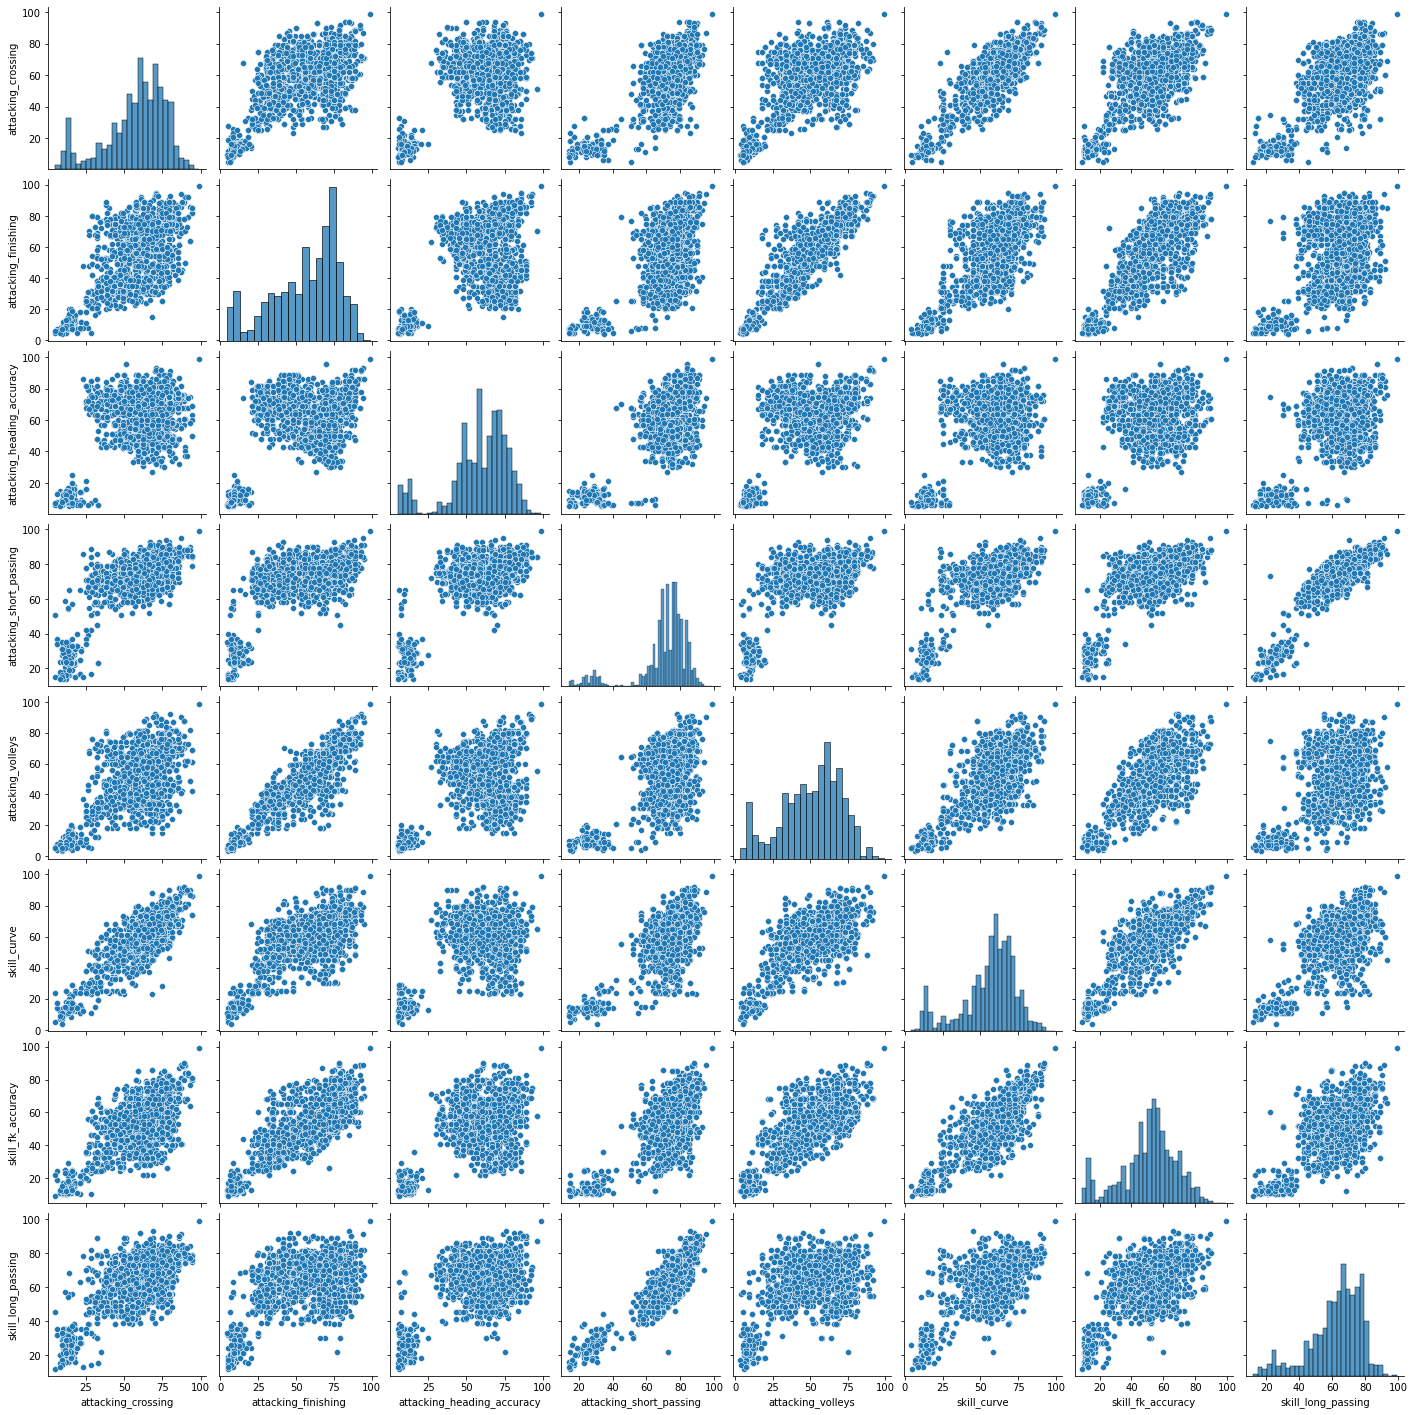

In [19]:
sns.pairplot(df_skills[skills_ratings[0:8]])

In [20]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5] #5,  2 ..
skill_2=skills_ratings[15]  #15, 29, 4 ..

#### Se observan dos clusteres

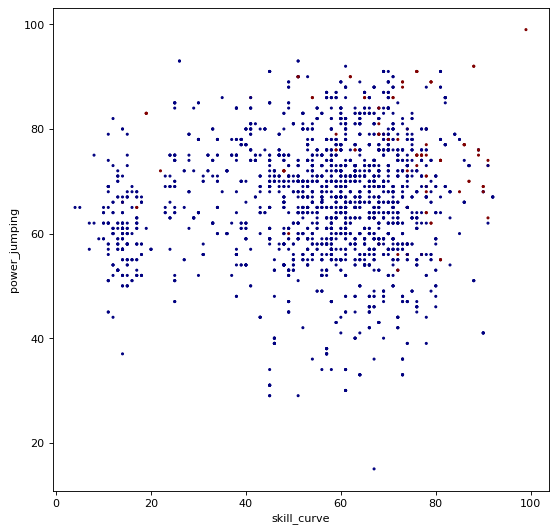

In [21]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

#### Nuevamente se observan claramente dos clusteres.

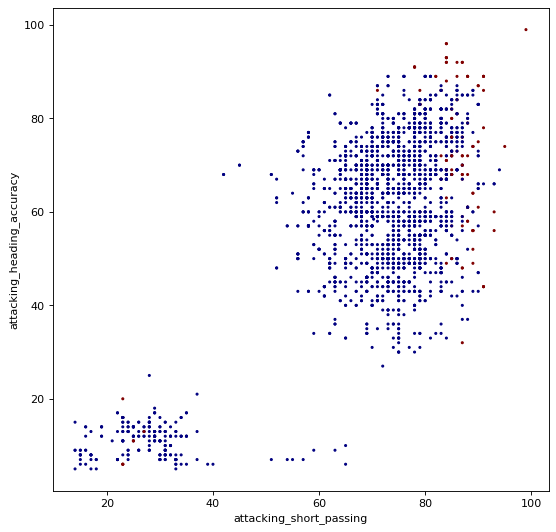

In [22]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['attacking_short_passing'], y=df_skills['attacking_heading_accuracy'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('attacking_short_passing')
plt.ylabel('attacking_heading_accuracy')
plt.show()

#### se observan dos clusteres.

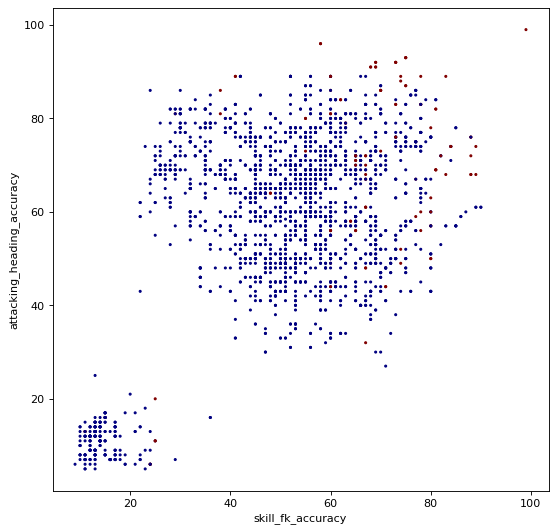

In [23]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['skill_fk_accuracy'], y=df_skills['attacking_heading_accuracy'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('skill_fk_accuracy')
plt.ylabel('attacking_heading_accuracy')
plt.show()

#### A continuacion se observan 3 o cuatro clusteres a simple vista.

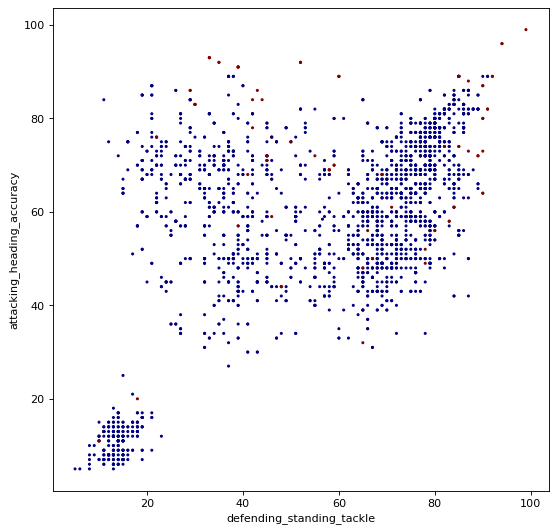

In [24]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['attacking_heading_accuracy'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('attacking_heading_accuracy')
plt.show()

#### se observan unos 4 clusteres.

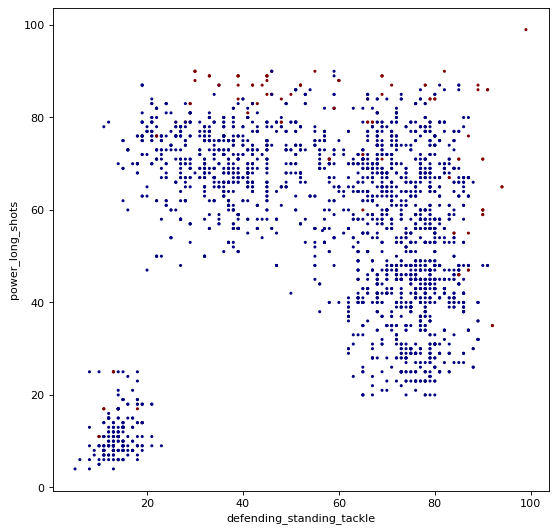

In [25]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['power_long_shots'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('power_long_shots')
plt.show()

#### 2 o 3 clusteres

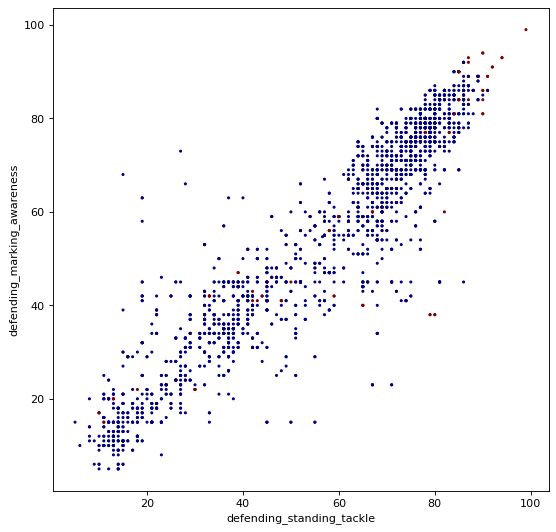

In [26]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['defending_marking_awareness'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('defending_marking_awareness')
plt.show()

#### Mas clusteres

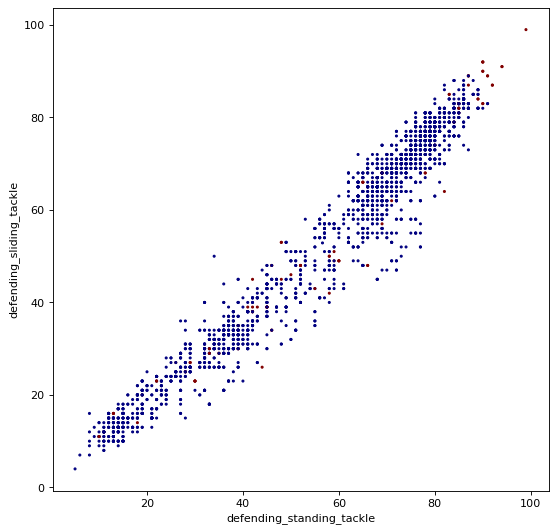

In [27]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['defending_sliding_tackle'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('defending_sliding_tackle')
plt.show()

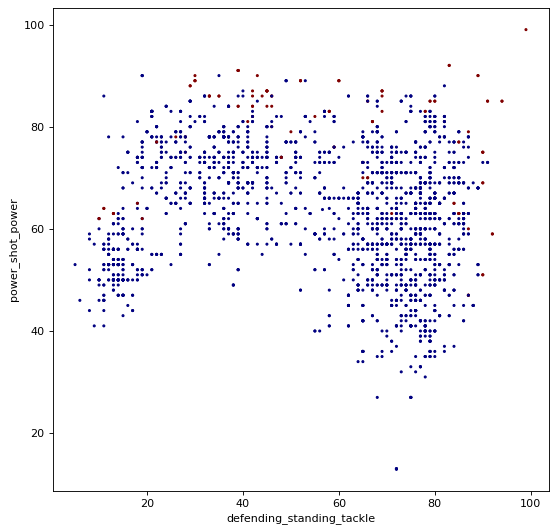

In [28]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['power_shot_power'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('power_shot_power')
plt.show()

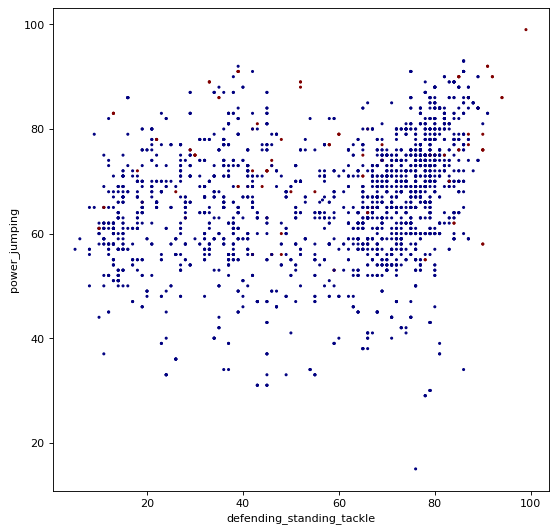

In [29]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['power_jumping'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('power_jumping')
plt.show()

### Visualizacion mas detallada
#### Se puede ovservar a las mejores jugadores y explorar los nombres de las jugadoras en el mapa de scatter.

In [30]:
#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1='defending_standing_tackle'
skill_2='power_shot_power'

In [31]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'long_name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'long_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [32]:
#En Colab
fig.show(renderer="colab")

In [33]:
plot(fig)

'temp-plot.html'

#### Ubicamos a Alexia Putellas Segura, considerada una de las mejores jugadoras del mundo, para tenerla de referencia en los sccater plot que queramos hacer.

In [34]:
#P/Gráfico 2

#Elegimos un jugador
recherche_joueur=df_n["long_name"]=='Alexia Putellas Segura'
#recherche_joueur=df_n["Name"]==df_n["Name"][4000] # acá podemos elegir otro

bool_crack=df_n["overall"] > 85

bool_elecc=df_n["club_position"]=='CB'

bool_no_crack=df_n["overall"]<86
bool_machinegun=df_n["long_name"]=='MachineGun'
#bool_elecc=df_n["Name"]=='JugadorPromedio'

#Elegir dos números entre 0 y  de n_skills-1
skill_1='defending_standing_tackle'  #6 , 2
skill_2='power_shot_power'  #25, 4

In [35]:
palette=['navy','red','#A2D5F2','orange','green','pink']

data=[]

n_crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Crack',
                      text=df_n.loc[bool_crack,'long_name'],
                      textfont=dict(family='sans serif',size=15,color='black'),
                      opacity=0.9,marker=dict(color=palette[2],size=7),mode='markers+text')

n_no_crack =go.Scatter(x=df_skills.loc[bool_no_crack,skill_1], y=df_skills.loc[bool_no_crack,skill_2],name='Average players',
                         text=df_n.loc[bool_no_crack,'long_name'],
                         opacity=0.6,marker=dict(color=palette[1],size=3),mode='markers')

n_elecc=go.Scatter(x=df_skills.loc[bool_elecc,skill_1], y=df_skills.loc[bool_elecc,skill_2],name='Elección',
                         text=df_n.loc[bool_elecc,'club_position'],
                         opacity=0.9,marker=dict(color=palette[0],size=5),mode='markers')

n_machinegun =go.Scatter(x=df_skills.loc[bool_machinegun,skill_1], y=df_skills.loc[bool_machinegun,skill_2],name='Perfect player',
                           textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=0.6,marker=dict(color=palette[3],size=30),mode='markers+text')


joueur_recherche =go.Scatter(x=df_skills.loc[recherche_joueur,skill_1], y=df_skills.loc[recherche_joueur,skill_2],name='Searched player',
                           text=df_n.loc[recherche_joueur,'long_name'],
                            textfont=dict(family='sans serif',size=20,color='black'),
                           opacity=1,marker=dict(color=palette[4],size=40),mode='markers+text')

data=[n_no_crack,n_elecc
      ,n_crack,n_machinegun,joueur_recherche]

layout = go.Layout(title="Fifa Players",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [36]:
plot(fig)

'temp-plot.html'

#### Aca se observa que Alexia Putellas Segura tiene mas de un dato, pero no se repiten los numeros.

In [37]:
df_n[df_n["long_name"]=='Alexia Putellas Segura']

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
1670,227203.0,/player/227203/alexia-putellas-segura/230006,23.0,6.0,2022-11-16,Alexia Putellas,Alexia Putellas Segura,"CM, LW",92.0,92.0,NaN,NaN,28.0,1994-02-04,173.0,67.0,2136.0,World Cup Women,NaN,113012.0,Spain W,SUB,14.0,NaN,NaN,NaN,45.0,Spain,NaN,NaN,NaN,Left,4.0,5.0,5.0,High/Medium,Normal (170-185),Yes,NaN,"#Dribbler, #Playmaker, #Crosser, #FK Specialis...","Leadership, Flair, Outside Foot Shot, Team Pla...",80.0,90.0,92.0,91.0,72.0,75.0,87.0,94.0,74.0,95.0,90.0,93.0,89.0,89.0,91.0,94.0,82.0,78.0,76.0,95.0,78.0,81.0,75.0,90.0,75.0,90.0,58.0,79.0,96.0,95.0,91.0,91.0,60.0,82.0,64.0,15.0,17.0,11.0,15.0,10.0,NaN,89+3,89+3,89+3,91,92,92,92,91,93-1,93-1,93-1,91+1,92,92,92,91+1,83+3,83+3,83+3,83+3,83+3,81+3,75+3,75+3,75+3,81+3,23+3,https://cdn.sofifa.net/players/227/203/23_120.png


In [38]:
len(df_n)

2476

In [39]:
df_n.shape

(2476, 110)

## Clustering

In [40]:
#saco este dato porque me arruina algunos graficos actuando como outlier
df_n.drop(df_n[df_n['long_name']=='MachineGun'].index, inplace=True) 
df_skills = df_n[skills_ratings].copy()
df_skills.dropna(inplace=True)

#### Diagrama de codo
###### Se observa que con 4 clusteres se estaria en el codo del diagrama.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

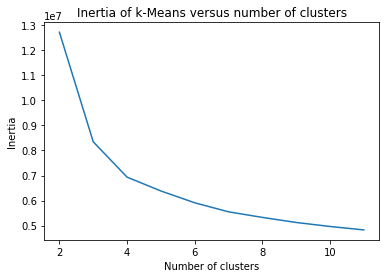

In [41]:
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

#### Agrego una columna con la posicion de cada jugador ya que sera util mas a delante.

In [42]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'

    elif position in midfielders:
        return 'Midfielder'

    elif position in defenders:
        return 'Defender'

    elif position in goalkeepers:
        return 'GK'

    else:
        return 'nan'

#### Aca tengo que usar la variable 'player_positions' pero esa columna contiene mas de una posicion, entonces me quedo solo con la primera y es lo que hago a continuacion.

In [43]:
df_n['player_positions'] = df_n['player_positions'].str.split(',').str[0]

In [44]:
df_n["Position2"]=df_n["player_positions"].apply(lambda x: pos2(x))

df_n["Position2"].value_counts()

Defender      823
Forward       755
Midfielder    672
GK            224
nan             1
Name: Position2, dtype: int64

In [45]:
df_n[df_n["Position2"]=='nan']

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,Position2
2475,NaN,NaN,NaN,NaN,NaN,NaN,JugadorPromedio,NaN,75.159192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.81899,56.035556,58.44,70.279192,49.984646,NaN,56.071111,51.002424,62.376162,69.549899,67.360808,68.316364,65.465051,72.658586,68.030303,63.778586,66.430303,66.894545,66.378182,55.541414,58.715152,55.334141,59.378182,62.000404,54.984646,66.453333,54.68202,56.580202,52.871515,16.13697,16.083232,16.031919,16.136162,16.384242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan


### Clustering con k-means

In [46]:
df_skills.info() # vemos que son todas variables numericas y se puede trabajar tranquilo.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2475
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   attacking_crossing           2475 non-null   float64
 1   attacking_finishing          2475 non-null   float64
 2   attacking_heading_accuracy   2475 non-null   float64
 3   attacking_short_passing      2475 non-null   float64
 4   attacking_volleys            2475 non-null   float64
 5   skill_curve                  2475 non-null   float64
 6   skill_fk_accuracy            2475 non-null   float64
 7   skill_long_passing           2475 non-null   float64
 8   skill_ball_control           2475 non-null   float64
 9   movement_acceleration        2475 non-null   float64
 10  movement_sprint_speed        2475 non-null   float64
 11  movement_agility             2475 non-null   float64
 12  movement_reactions           2475 non-null   float64
 13  movement_balance  

In [47]:
#df_n=df_n.dropna()
df_skills =df_n[skills_ratings].dropna()
df_skills =df_skills.reset_index(drop=True)

In [48]:
# Número de clusters buscado
n_clust = 5

km = KMeans(n_clusters=n_clust)
km.fit(df_skills) #utiliza todas las habilidades

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)

In [49]:
#df_n=df_n.dropna(subset=skills_ratings)
df_clusters=df_skills.copy()


In [50]:
len(km.labels_)

2475

In [51]:
df_clusters['kmeans_5'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  5 clusters, nosotros forzamos la cantidad


,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,kmeans_5
0,70.0,93.0,91.0,78.0,92.0,76.0,68.0,64.0,92.0,89.0,85.0,90.0,91.0,82.0,91.0,91.0,87.0,86.0,89.0,70.0,24.0,95.0,79.0,75.0,92.0,44.0,39.0,30.0,7.0,12.0,8.0,16.0,13.0,0
1,51.0,70.0,96.0,84.0,55.0,65.0,58.0,87.0,85.0,65.0,62.0,53.0,90.0,34.0,85.0,86.0,75.0,93.0,65.0,88.0,90.0,70.0,59.0,75.0,84.0,93.0,94.0,91.0,7.0,14.0,17.0,11.0,15.0,4
2,71.0,95.0,86.0,91.0,87.0,68.0,70.0,82.0,93.0,88.0,89.0,83.0,84.0,67.0,90.0,81.0,87.0,81.0,83.0,53.0,46.0,92.0,75.0,88.0,92.0,41.0,43.0,39.0,11.0,11.0,10.0,10.0,11.0,3
3,71.0,94.0,93.0,84.0,90.0,79.0,75.0,72.0,91.0,81.0,85.0,74.0,92.0,47.0,86.0,89.0,75.0,81.0,89.0,65.0,23.0,96.0,76.0,86.0,86.0,42.0,33.0,30.0,15.0,7.0,12.0,10.0,14.0,0


In [52]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1='defending_standing_tackle'
skill_2='power_long_shots'
#skill_1=skills_ratings[4]
#skill_2=skills_ratings[11]

In [53]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        #text=df_n.loc[:,'long_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
 #                     #text=df_n.loc[bool_crack,'long_name'],
  #                    textfont=dict(family='sans serif',size=10,color='black'),
   #                   opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [54]:
plot(fig)

'temp-plot.html'

In [55]:
df_test =df_n.copy()
df_test.dropna(subset=skills_ratings,inplace=True)
len(df_test)

2475

### En el siguiente grafico se observa que el cluster 3 esta conformado unicamente de arqueras.

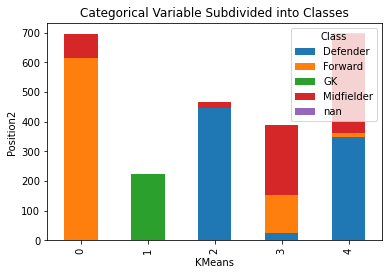

In [56]:
df_test['KMeans']=clusters
grouped = df_test.groupby(['KMeans', 'Position2']).size().unstack(fill_value=0)
# Create a stacked bar plot
ax = grouped.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('KMeans')
plt.ylabel('Position2')
plt.title('Categorical Variable Subdivided into Classes')

# Show the plot
plt.legend(title='Class', loc='upper right')
plt.show()

### MeanShift

In [57]:
ms = MeanShift() #le quite bandwidth=numero,bin_seeding=False para que labure por default y de mejor resultado.

ms.fit(df_skills)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 2


#### graficamos

In [58]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1='defending_standing_tackle'
skill_2='power_long_shots'

In [59]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        #text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
 #                     #text=df_n.loc[bool_crack,'Name'],
  #                    textfont=dict(family='sans serif',size=10,color='black'),
   #                   opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [60]:
plot(fig)

'temp-plot.html'

In [61]:
df_clusters['MeanShift'] = ms.labels_ #clusters2
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros lo forzamos')
print('Mean shift encontró ', max(ms.labels_)+1, 'clusters, según los hiperparámetros elegidos')

Kmeans encontró:  5 clusters, nosotros lo forzamos
Mean shift encontró  2 clusters, según los hiperparámetros elegidos


### DBSCAN

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
db = DBSCAN(eps=40, min_samples=6).fit(df_skills)
labels = db.labels_
clusters2 = db.labels_


labels_unique = np.unique(clusters2)

In [64]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 10
Estimated number of noise points: 495


In [65]:
data=[]
DBSCAN_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        #text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      #text=df_n.loc[bool_crack,'Name'],
   #                   textfont=dict(family='sans serif',size=10,color='black'),
    #                  opacity=0.9,mode='text')

data=[DBSCAN_clusters,crack]

layout = go.Layout(title="DBSCAN",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [66]:
plot(fig)

'temp-plot.html'

In [67]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64)

In [68]:
unique_values, counts = np.unique(labels, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: -1, Count: 495
Value: 0, Count: 1721
Value: 1, Count: 5
Value: 2, Count: 7
Value: 3, Count: 201
Value: 4, Count: 6
Value: 5, Count: 13
Value: 6, Count: 6
Value: 7, Count: 6
Value: 8, Count: 7
Value: 9, Count: 8


# Realizo el analisis nuevamente sin los arqueros
#### Como en los graficos de clusters realizados anteriormente se puede ver que las arqueras estan bien distinguidas, y como nuestro objetivo es encontrar clusteres de jugadoras con habilidades diferentes que sirva para saber cuando sustituir a una jugadora por otra, los arqueras no van a ser consideradas.

In [69]:
df_n.drop(df_n[df_n['Position2']=='GK'].index, inplace=True)
df_n=df_n.dropna(subset=skills_ratings)

In [70]:
df_n['Position2'].value_counts()

Defender      823
Forward       755
Midfielder    672
nan             1
Name: Position2, dtype: int64

In [71]:
df_skills =df_n[skills_ratings].dropna()
df_skills =df_skills.reset_index(drop=True)

#### Grafico nuevamente el codo y esta vez no esta tan claro donde se encuentra.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

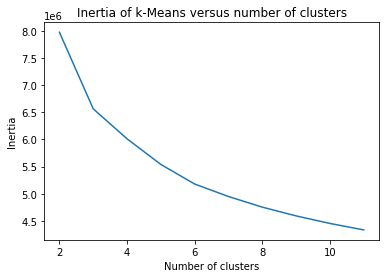

In [72]:
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

### KMeans

#### Como se buscan jugadoras similares, no queremos pocos clusters porque queremos rescatar detalles, por eso se elijen 6 clusters, se probaron diferentes numeros de clusters y diferentes parametros, el parametro init= random inicializa los centroides en lugares random, y n_init=20 nos dice que la cantidad de iteraciones del algoritmo tiene un maximo de 20

In [73]:
# Número de clusters buscado
n_clust = 6

km = KMeans(n_clusters=n_clust,init='random',n_init=20)
km.fit(df_skills) #utiliza todas las habilidades

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
df_n['KMeans']=clusters
#print('Suma de los cuadrados de las distancias al centro de cada cluster=Inertia= ', km.inertia_)
df_clusters=df_skills.copy()


In [74]:
df_clusters['kmeans_5'] = km.labels_ #clusters
print('Kmeans encontró: ', max(km.labels_)+1, 'clusters, nosotros forzamos la cantidad')
df_clusters.head(4)

Kmeans encontró:  6 clusters, nosotros forzamos la cantidad


,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,kmeans_5
0,70.0,93.0,91.0,78.0,92.0,76.0,68.0,64.0,92.0,89.0,85.0,90.0,91.0,82.0,91.0,91.0,87.0,86.0,89.0,70.0,24.0,95.0,79.0,75.0,92.0,44.0,39.0,30.0,7.0,12.0,8.0,16.0,13.0,2
1,51.0,70.0,96.0,84.0,55.0,65.0,58.0,87.0,85.0,65.0,62.0,53.0,90.0,34.0,85.0,86.0,75.0,93.0,65.0,88.0,90.0,70.0,59.0,75.0,84.0,93.0,94.0,91.0,7.0,14.0,17.0,11.0,15.0,3
2,71.0,95.0,86.0,91.0,87.0,68.0,70.0,82.0,93.0,88.0,89.0,83.0,84.0,67.0,90.0,81.0,87.0,81.0,83.0,53.0,46.0,92.0,75.0,88.0,92.0,41.0,43.0,39.0,11.0,11.0,10.0,10.0,11.0,2
3,71.0,94.0,93.0,84.0,90.0,79.0,75.0,72.0,91.0,81.0,85.0,74.0,92.0,47.0,86.0,89.0,75.0,81.0,89.0,65.0,23.0,96.0,76.0,86.0,86.0,42.0,33.0,30.0,15.0,7.0,12.0,10.0,14.0,2


In [75]:
bool_crack=df_n["overall"] > 85
bool_no_crack=df_n["overall"]<86

#Eligo dos números entre 0 y  de n_skills-1
skill_1='defending_standing_tackle'
skill_2='power_long_shots'
#skill_1=skills_ratings[4]skill_1=skills_ratings[12]


In [76]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        #text=df_n.loc[:,'long_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      #text=df_n.loc[bool_crack,'long_name'],
 #                     textfont=dict(family='sans serif',size=10,color='black'),
 #                    opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [77]:
plot(fig)

'temp-plot.html'

### MeanShift
 #### Se encontro que la unica forma de que el algoritmo converga a un numero bajo de clusteres es que trabaje por default, ya que modifcando los parametros el numero de clusteres se dispara a valores superiores a 700 y eso no sirve.

In [78]:
ms = MeanShift() #le quite bandwidth=numero,bin_seeding=False para que labure por default y de mejor resultado.

ms.fit(df_skills)
clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_
df_n['MeanShift']=clusters2
labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 1


In [79]:
data=[]
MeanShift_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        #text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      #text=df_n.loc[bool_crack,'Name'],
       #               textfont=dict(family='sans serif',size=10,color='black'),
        #              opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [80]:
plot(fig)

'temp-plot.html'

### DBSCAN

#### Este algoritmo es el menos util de todos los probados, se logro hacerlo converger a una cantidad de 2 cluster, es decir que es inutil. Probando diferentes valores de parametros se logro aumentar la cantidad de clusteres pero dichos clusters tenian muy pocos datos a excepcion de un cluster mayor que abarcaba la mayoria del dataset, por eso se eligieron los parametros eps=38 y min_samples = 20

In [119]:
db = DBSCAN(eps=38, min_samples=20).fit(df_skills)

clusters2 = db.labels_
df_n['DBSCAN']=clusters2
np.unique(clusters2)

array([-1,  0], dtype=int64)

In [117]:
skill_1=skills_ratings[12]
skill_2=skills_ratings[8]

data=[]
DBSCAN_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        #text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      #text=df_n.loc[bool_crack,'Name'],
   #                   textfont=dict(family='sans serif',size=10,color='black'),
    #                  opacity=0.9,mode='text')

data=[DBSCAN_clusters,crack]

layout = go.Layout(title="DBSCAN",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [111]:
plot(fig)

'temp-plot.html'

### Gausian Mixture

#### Se prueba este algoritmo porque creemos que es mejor decirle al algoritmo cuantos clusteres queremos y asi poder ir jugando con eso

In [85]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=5,init_params='kmeans').fit(df_skills)

In [97]:
labels = gm.predict(df_skills)
clusters2 = labels
df_n['GaussianMixture']=clusters2
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

In [98]:
#skill_1=skills_ratings[12]
skill_2='power_jumping'

data=[]
gm_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        #text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      #text=df_n.loc[bool_crack,'Name'],
   #                   textfont=dict(family='sans serif',size=10,color='black'),
    #                  opacity=0.9,mode='text')

data=[gm_clusters,crack]

layout = go.Layout(title="GaussianMixture",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [99]:
plot(fig)

'temp-plot.html'

### cluster jeriarquico
#### Por ultimo se prueba cluster jerarquico

In [89]:
from sklearn.cluster import AgglomerativeClustering

k = 3  # Number of clusters
agg_cluster = AgglomerativeClustering(n_clusters=k)
clusters2 = agg_cluster.fit_predict(df_skills)
df_n['jeriarquico']=clusters2
np.unique(clusters2)

array([0, 1, 2], dtype=int64)

In [90]:
#skill_1=skills_ratings[12]
skill_2='power_long_shots'

data=[]
gm_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        #text=df_n.loc[:,'Name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

#crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      #text=df_n.loc[bool_crack,'Name'],
   #                   textfont=dict(family='sans serif',size=10,color='black'),
    #                  opacity=0.9,mode='text')

data=[gm_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [91]:
plot(fig)

'temp-plot.html'

In [92]:
df_n.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'rcb', 'rb', 'gk', 'player_face_url', 'Position2', 'KMeans',
       'MeanShift', 'DBSCAN', 'GaussianMixture', 'jeriarquico'],
      dtype='object', length=116)

# 5. Analisis de los clusters
#### se grafica un barplot para cada algoritmo de cluster

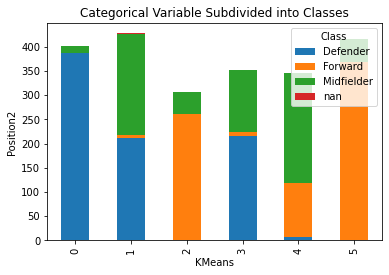

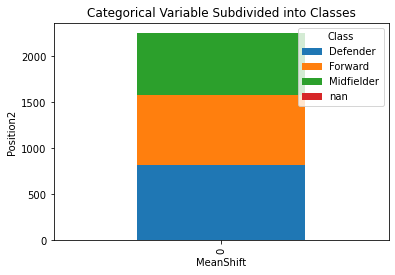

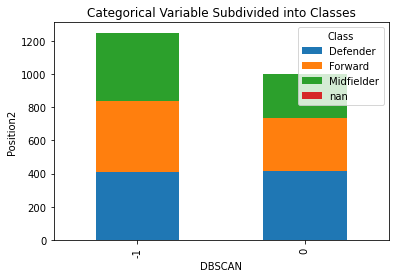

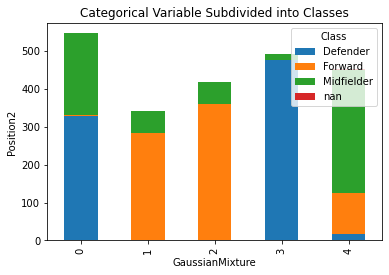

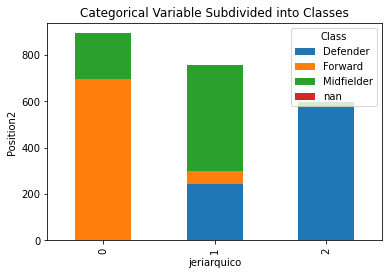

In [120]:
clusters = ['KMeans','MeanShift', 'DBSCAN', 'GaussianMixture', 'jeriarquico']
for cluster in clusters:
    grouped = df_n.groupby([cluster, 'Position2']).size().unstack(fill_value=0)

    # Create a stacked bar plot
    ax = grouped.plot(kind='bar', stacked=True)

    # Add labels and title
    plt.xlabel(str(cluster))
    plt.ylabel('Position2')
    plt.title('Categorical Variable Subdivided into Classes')

    # Show the plot
    plt.legend(title='Class', loc='upper right')
    plt.show()

### Se realizara un analisis cualitativo de los clusteres encontrados por KMeans y GaussianMixture

### Analisis clusters Kmeans

In [121]:
pd.crosstab(df_n.KMeans,df_n.Position2)

Position2,Defender,Forward,Midfielder,nan
KMeans,,,,
0,388,0,14,0
1,211,6,210,1
2,0,262,44,0
3,216,8,129,0
4,8,111,227,0
5,0,368,48,0


En el la siguiente tabla de defensoras vemos que el cluster 0 (se ve en el barplot que ese cluster contiene mayoritariamente defensoras) contiene a las defensoras con el menor puntaje de 'power_long_shot', las defensoras son las jugadoras en general con peor disparo y seria natural encntrar un cluster con ellas.

In [131]:
columns_to_show = ['defending_standing_tackle', 
                   'power_long_shots','attacking_heading_accuracy']

df_n[df_n['Position2']=='Defender'].groupby(['KMeans'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

defending_standing_tackle                       power_long_shots  \
                            mean       std  amin  amax             mean   
KMeans                                                                    
0                      76.409794  6.373768  56.0  92.0        35.963918   
1                      70.985782  5.544176  50.0  82.0        46.417062   
3                      81.074074  4.313750  71.0  94.0        54.694444   
4                      76.250000  3.412163  68.0  78.0        74.000000   

                             attacking_heading_accuracy                        
             std  amin  amax                       mean       std  amin  amax  
KMeans                                                                         
0       9.380211  20.0  68.0                  71.721649  7.739949  43.0  89.0  
1       8.817542  29.0  75.0                  60.374408  7.500927  45.0  77.0  
3       9.989723  27.0  86.0                  74.675926  8.566923  55.0  96.0  
4       4.566962  69.0  79.0                  71.750000  2.659216  68.0  74.0

En el la siguiente tabla de delanteras vemos que el cluster 2 y 5
(se ve en el barplot que ese cluster contiene mayoritariamente delanteras) 
contiene a las defensoras con el menor puntaje de 'defending_standind_tackle',pero con el 
mayor puntaje en power_long_shot, es decir, son delanteras practicamente puras que no tienen habilidad 
de defender pero tienen buen disparo.

In [132]:
columns_to_show = ['defending_standing_tackle', 
                   'power_long_shots','attacking_heading_accuracy']

df_n[df_n['Position2']=='Forward'].groupby(['KMeans'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

defending_standing_tackle                       power_long_shots  \
                            mean       std  amin  amax             mean   
KMeans                                                                    
1                      62.166667  5.192944  52.0  66.0        56.833333   
2                      36.507634  9.378684  11.0  59.0        76.881679   
3                      78.125000  6.034129  71.0  85.0        68.125000   
4                      59.612613  8.983997  40.0  86.0        71.450450   
5                      32.877717  9.318099  12.0  67.0        66.328804   

                             attacking_heading_accuracy                         
             std  amin  amax                       mean        std  amin  amax  
KMeans                                                                          
1       2.483277  52.0  59.0                  50.666667  11.621819  40.0  65.0  
2       6.390046  48.0  90.0                  69.603053  12.603703  30.0  93.0  
3       3.181981  62.0  71.0                  69.500000   5.503246  62.0  74.0  
4       8.776766  48.0  89.0                  56.405405  13.003761  32.0  84.0  
5       7.481351  45.0  79.0                  58.366848  12.893134  27.0  87.0

Ninguno de los clusters tiene predominantemente a las mediocampistas, no tengo mucho para decir excepto que al estar distruidas sobre mas clusteres es mejor encontrar una jugadora con caracteristicas similares.

In [130]:
columns_to_show = ['defending_standing_tackle', 
                   'power_long_shots','attacking_heading_accuracy']

df_n[df_n['Position2']=='Midfielder'].groupby(['KMeans'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

defending_standing_tackle                        power_long_shots  \
                            mean        std  amin  amax             mean   
KMeans                                                                     
0                      76.642857   2.790289  72.0  83.0        37.214286   
1                      67.700000   6.518322  52.0  81.0        58.880952   
2                      42.545455  11.620860  19.0  57.0        78.772727   
3                      79.612403   4.958122  66.0  90.0        65.899225   
4                      68.312775   8.919203  27.0  87.0        75.537445   
5                      38.229167   7.158508  24.0  51.0        67.312500   

                              attacking_heading_accuracy                   \
              std  amin  amax                       mean        std  amin   
KMeans                                                                      
0        9.585073  20.0  53.0                  64.857143   9.875043  45.0   
1        9.070174  37.0  82.0                  52.085714   8.006115  33.0   
2        6.853496  66.0  90.0                  64.340909  13.056128  31.0   
3       10.871296  28.0  87.0                  65.596899  10.142361  42.0   
4        6.221726  62.0  90.0                  54.180617   9.500721  33.0   
5        4.977209  56.0  75.0                  52.041667   6.655531  41.0   

              
        amax  
KMeans        
0       78.0  
1       77.0  
2       85.0  
3       86.0  
4       89.0  
5       61.0

### Analisis clusters GaussianMixture

In [134]:
pd.crosstab(df_n.GaussianMixture,df_n.Position2)

Position2,Defender,Forward,Midfielder,nan
GaussianMixture,,,,
0,328,3,216,0
1,0,284,57,0
2,0,360,58,0
3,477,0,16,0
4,18,108,325,1


Se ve que el cluster 3 contiene mayoritariamente a defensoras, cuyo power_long_shot es inferior al resto.

In [138]:
columns_to_show = ['defending_standing_tackle', 
                   'power_long_shots','attacking_heading_accuracy']

df_n[df_n['Position2']=='Defender'].groupby(['GaussianMixture'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

defending_standing_tackle                        \
                                     mean       std  amin  amax   
GaussianMixture                                                   
0                               76.695122  6.625295  50.0  94.0   
3                               75.817610  6.785292  56.0  92.0   
4                               79.222222  5.745131  68.0  86.0   

                power_long_shots                         \
                            mean        std  amin  amax   
GaussianMixture                                           
0                      52.722561  10.233027  24.0  86.0   
3                      37.020964   8.950822  20.0  67.0   
4                      66.777778   3.978701  61.0  79.0   

                attacking_heading_accuracy                         
                                      mean        std  amin  amax  
GaussianMixture                                                    
0                                68.496951  10.262010  45.0  96.0  
3                                70.182390   9.129913  43.0  89.0  
4                                73.722222   8.244824  58.0  83.0

Los clusters 1 y 2 contienen mayoritariamente delanteras con las peores habilidades defensivas, pero las del cluster 2 son mejores en los disparos y en los cabeceos.

In [140]:
columns_to_show = ['defending_standing_tackle', 
                   'power_long_shots','attacking_heading_accuracy']

df_n[df_n['Position2']=='Forward'].groupby(['GaussianMixture'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

defending_standing_tackle                         \
                                     mean        std  amin  amax   
GaussianMixture                                                    
0                               64.333333   2.309401  63.0  67.0   
1                               35.440141  10.330575  15.0  71.0   
2                               34.725000  10.240802  11.0  61.0   
4                               60.370370  10.959221  37.0  86.0   

                power_long_shots                        \
                            mean       std  amin  amax   
GaussianMixture                                          
0                      61.000000  5.196152  58.0  67.0   
1                      65.017606  7.506160  45.0  83.0   
2                      74.991667  7.275512  48.0  90.0   
4                      71.518519  8.047152  48.0  89.0   

                attacking_heading_accuracy                         
                                      mean        std  amin  amax  
GaussianMixture                                                    
0                                63.333333   2.886751  60.0  65.0  
1                                56.869718  12.962869  30.0  83.0  
2                                67.922222  12.323158  27.0  93.0  
4                                55.953704  13.845195  30.0  84.0

El cero y el cuatro contienen mayoritariamente a mediocampistas, que tienen similares habilidades pero las del cluster 0 son peores en disparo que las del grupo 4. Se puede ver que los clusteres son bastante diferentes entre si.

In [141]:
columns_to_show = ['defending_standing_tackle', 
                   'power_long_shots','attacking_heading_accuracy']

df_n[df_n['Position2']=='Midfielder'].groupby(['GaussianMixture'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

defending_standing_tackle                         \
                                     mean        std  amin  amax   
GaussianMixture                                                    
0                               73.384259   7.520857  55.0  90.0   
1                               49.719298  13.607711  24.0  81.0   
2                               42.396552  13.224034  19.0  72.0   
3                               71.437500   7.957962  55.0  79.0   
4                               69.190769   9.690611  25.0  90.0   

                power_long_shots                         \
                            mean        std  amin  amax   
GaussianMixture                                           
0                      59.685185  11.638867  28.0  87.0   
1                      63.333333   8.305191  45.0  75.0   
2                      75.689655   6.741354  66.0  89.0   
3                      44.375000  13.012174  20.0  63.0   
4                      72.704615   8.037267  53.0  90.0   

                attacking_heading_accuracy                         
                                      mean        std  amin  amax  
GaussianMixture                                                    
0                                58.449074  10.681312  35.0  84.0  
1                                49.473684   6.522229  41.0  61.0  
2                                60.448276  13.464928  31.0  85.0  
3                                61.625000  12.701050  43.0  78.0  
4                                55.381538  10.128296  33.0  89.0

# 6. Proyeccion con embeddings:tSNE

In [142]:
X=df_n[skills_ratings]

In [144]:
from sklearn import (manifold, preprocessing, decomposition)
import time

In [145]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2251 samples in 0.001s...
[t-SNE] Computed neighbors for 2251 samples in 0.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2251
[t-SNE] Computed conditional probabilities for sample 2000 / 2251
[t-SNE] Computed conditional probabilities for sample 2251 / 2251
[t-SNE] Mean sigma: 17.522659
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.688187
[t-SNE] KL divergence after 1000 iterations: 0.725504
t-SNE done! Time elapsed: 17.6206476688385 seconds


In [146]:
print(X_tsne.shape)
print(X_tsne)

(2251, 2)
[[ 54.475754   -36.10453   ]
 [ -0.10229808  67.5716    ]
 [ 52.60614    -32.066284  ]
 ...
 [-37.24491     -1.7038425 ]
 [-45.36116     17.500322  ]
 [-24.97086     -4.8182125 ]]


In [149]:
data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_n.loc[:,'Position2'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

#crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
 #                     text=df_sne.loc[bool_crack,'Name'],
  #                    textfont=dict(family='sans serif',size=10,color='black'),
   #                   opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
#plot(fig)

In [150]:
plot(fig)

'temp-plot.html'

### diferenciamos por posicion

In [155]:
bool_striker= df_n["Position2"] == 'Forward'
bool_midfielder= df_n["Position2"] == 'Midfielder'
bool_defender= df_n["Position2"] == 'Defender'
#bool_gk= df_sne["Position2"] == 'GK'

bool_crack=df_n["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_n.loc[bool_striker,'long_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_n.loc[bool_midfielder,'long_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_n.loc[bool_defender,'long_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

#gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
 #                     text=df_n.loc[bool_gk,'long_name'],
  #                    opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_n.loc[bool_crack,'long_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

#iplot(fig)
#plot(fig)

In [156]:
plot(fig)

'temp-plot.html'